In [92]:
%matplotlib inline
from Bio.SeqUtils import GC_skew
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO
from Bio import Phylo
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

Useful Documentation for Bio.SeqUtils: 

https://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html#GC_skew 

https://biopython.org/DIST/docs/api/Bio.Align.MultipleSeqAlignment-class.html

In [93]:
tree = Phylo.read("tree.nwk", "newick")
#Phylo.draw_graphviz(tree)
Phylo.draw_ascii(tree)

 , rh.61
 |
 |_ rh.58
 |
 |                               , pi.2
 |           ____________________|
 |          |                    , pi.3
 |          |                    |
 |          |                    | pi.1
 |          |
 |          |           , rh.10
 |        __|          _|
 |       |  |         | , bb.1
 |       |  |         | |
 |       |  |  _______| | bb.2
 |       |  | |       |
 |       |  | |       | _ hu.17
 |       |  | |       ||
 |       |  |_|        | hu.6
 |       |    |
 |       |    |    _______ rh.2
 |       |    |   |
 |       |    |___|          __ rh.40
 |       |        |         |
 |       |        |_________|, hu.67
 |       |                  ||
 |       |                  |, hu.37
 |       |                   |
 |       |                   , hu.40
 |       |                   |
 |       |                   | hu.66
 |       |                   |
 |       |                   , hu.41
 |       |                   |
 |       |                   | rh.38
 

In [98]:
#make it easy to extract sequences
record_dict = SeqIO.to_dict(SeqIO.parse("seqs.fa", "fasta"))

#pick a single representative from each cluster
seqs = ["hu.41", 'pi.2', "rh.51", "hu.32", "rh.37"]

#print out FASTA sequences
for i in seqs:
    print(i)
    print(record_dict[i].seq)
    print("___________________________________________________________________________________________________________")

hu.41
atggctgctgacggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggacctgaaacctggagcccccaagcccaaggccaaccagcagaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgcggcggacgcagcggccctcgagcacgacaaggcctacgaccagcagctcaaagcgggtgacaatccgtacctgcggtataaccacgccgacgccgagtttcaggagcgtctacaagaagatacgtcttttgggggcaacctcgggcgagcagtcttccaggccaagaagcgggttctcgaacctctcggtccggttgaggaagctgctaagacggctcctggaaagaagagaccggtagaaccgccacctcagcgttcccccgactcctccacgggcatcggcaagaaaggccagcagcccgctaaaaagagactgaactttggtcagactggcgactcagagtcagtccccgaccctcaaccaatcggagaaccaccagcaggcccctctggtctgggatctggtacaatggctgcaggcggtggcgctccaatggcagacaataacgaaggcgccgacggagtgggtagttcctcaggaaattggcattgcgattccacatggctgggcgacagagtcatcaccaccagcacccgaacctgggccctgcccacctacaacaaccacctctacaagcaaatatccaatgggacatcgggaggaagcaccaacgacaacacctacttcggctacagcaccccctgggggtattttgacttcaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggccaaaaagactcagcttcaagctcttcaacatccaggtcaaggaggtcacgcagaatgaaggca

What are some of the most common matches for each cluster? 
Write them down in your lab notebook. 
Do they all match the same gene? 
Are there any that definitely do not match the others? 
Why might we not trust the annotations for sequences that come up in our BLAST?


Common matches for each cluster:

hu.41 : AAV hu.41, hu.4, hu.37, etc. for capsid protein VP1

pi.2  : AAV pi2, pi3, etc. for caspid protein VP1

rh.51 : AAV rh.51, rh.64, rh.46, etc. for capsid protein VP1

hu.32 : AAV hu.32, hu.31, hu.14 for capsid protein VP1

rh.37 : AAV rh.37, rh.35, rh.36 for capsid protein VP1

They mostly all match the same gene, but some of the clusters I identified from the alignment tree are different than what show up during the BLAST. We might not trust the annotations within blasts because they might not show homologous genes or relationships.


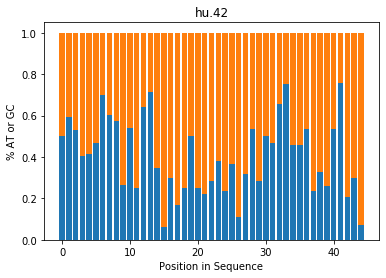

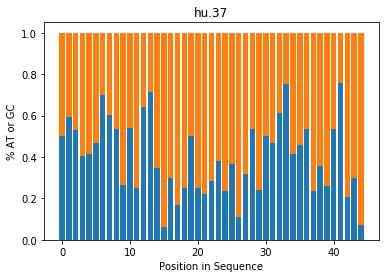

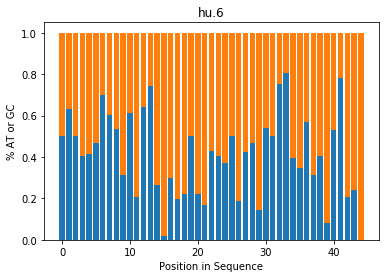

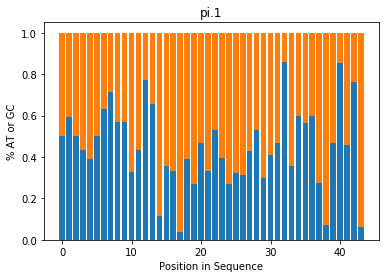

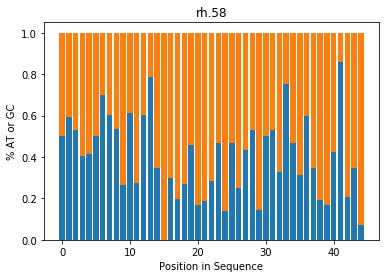

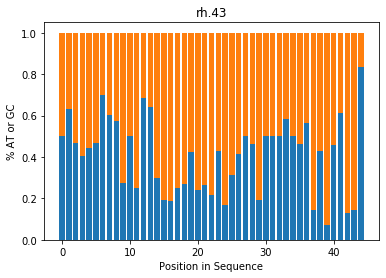

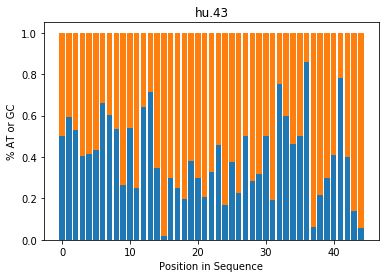

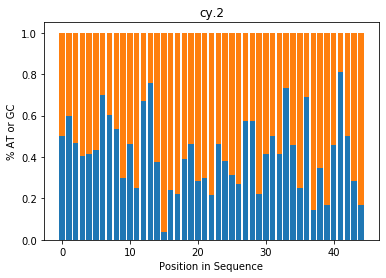

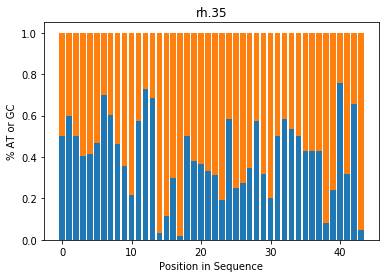

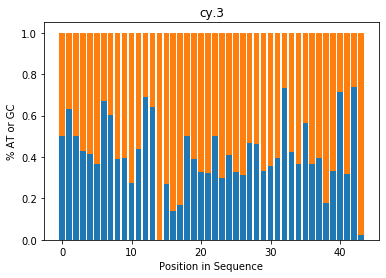

In [95]:
#Calculating and Plotting GC Content

#select a single gene from each cluster
cluster_reps = ["hu.42", 'hu.37', 'hu.6', 'pi.1', 'rh.58', 'rh.43', 'hu.43', 'cy.2', 'rh.35', 'cy.3']

#Iterate through cluter_reps
for j in cluster_reps:
    seq_current = record_dict[j].seq
    
    #calculate the GC content
    GC_percentage = GC_skew(seq_current, window = 50)
    
    #normalize the data to be between 0 and 1
    GC_percent_normal = [abs(0.5+i) for i in GC_percentage]
    
    #AC percentage is just 1-GC at any given point
    AC_percent_normal = [1-i for i in GC_percent_normal]
    length = np.arange(len(GC_percent_normal))
    
    #plot the graph
    plot1 = plt.bar(length, GC_percent_normal)
    plot2 = plt.bar(length, AC_percent_normal, bottom= GC_percent_normal)
    
    #add axes labels and title
    plt.xlabel('Position in Sequence')
    plt.ylabel('% AT or GC')
    plt.title(j)
    
    #Plot each graph
    plt.show()

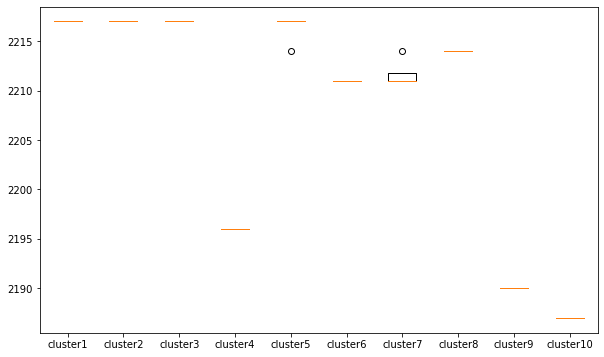

In [103]:
#Generate boxplot with all the sequence lengths

#use aligned sequences
record_dict2 = SeqIO.to_dict(SeqIO.parse("seqs.fa", "fasta"))

#Define all the clusters
cluster1 = ['hu.42', 'rh.38', 'hu.41', 'hu.66', 'hu.40']
cluster2 = ['hu.37', 'hu.67', 'rh.40', 'rh.2']
cluster3 = ['hu.6', 'hu.17', 'bb.2', 'bb.1', 'rh.10']
cluster4 = ['pi.1', 'pi.2', 'pi.3']
cluster5 = ['rh.58', 'rh.52', 'rh.49', 'rh.51', 'rh.57', 'rh.55', 'rh.61']
cluster6 = ['rh.43', 'hu.32', 'hu.31', 'hu.14']
cluster7 = ['hu.43', 'hu.48', 'hu.46', 'hu.44']
cluster8 = ['cy.2', 'rh.54', 'rh.55', 'rh.48', 'rh.62']
cluster9 = ['rh.35', 'rh.36', 'rh.37']
cluster10= ['cy.3', 'cy.6', 'cy.4', 'cy.5', 'rh.13']

#make a list of all the clusters
cluster_categories = [cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8, cluster9, cluster10]

#Make a list of the lengths
len1 = [len(record_dict2[i].seq) for i in cluster1]
len2 = [len(record_dict2[i].seq) for i in cluster2]
len3 = [len(record_dict2[i].seq) for i in cluster3]
len4 = [len(record_dict2[i].seq) for i in cluster4]
len5 = [len(record_dict2[i].seq) for i in cluster5]
len6 = [len(record_dict2[i].seq) for i in cluster6]
len7 = [len(record_dict2[i].seq) for i in cluster7]
len8 = [len(record_dict2[i].seq) for i in cluster8]
len9 = [len(record_dict2[i].seq) for i in cluster9]
len10= [len(record_dict2[i].seq) for i in cluster10]

#create a list of all the cluster lengths lists
len_groups = [len1, len2, len3, len4, len5, len6, len7, len8, len9, len10]

plt.boxplot(len_groups, labels = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6', 'cluster7', 'cluster8', 'cluster9', 'cluster10'])
plt.rcParams['figure.figsize'] = [5, 10]
